In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv


**Hiiiiiiiiiiiiiii, going to get intution about the BackPropagation through this Project**

In [2]:
df= pd.read_csv("/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv")

In [3]:
df.sample(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
6091,6092,15777896,Chukwudi,850,Germany,Female,33,2,83415.04,1,0,1,74917.64,0
4668,4669,15780770,Kerr,445,France,Male,31,7,145056.59,1,1,1,175893.53,0
300,301,15803976,Efremov,694,France,Female,31,10,0.00,2,1,0,160990.27,0
5470,5471,15736124,Thompson,617,France,Male,25,1,102585.88,2,1,1,115387.40,0
5063,5064,15592578,Nucci,614,Spain,Female,41,7,146997.64,2,0,0,137791.18,0
2005,2006,15725835,West,785,Germany,Female,32,3,124493.03,2,0,1,52583.79,1
9991,9992,15769959,Ajuluchukwu,597,France,Female,53,4,88381.21,1,1,0,69384.71,1
9464,9465,15786035,Gosnell,740,France,Male,39,9,0.00,2,1,0,19047.23,0
1053,1054,15798348,Chukwuebuka,600,Spain,Female,50,6,94684.27,1,1,1,50488.91,0
8213,8214,15748352,Endrizzi,598,Spain,Male,34,0,104488.17,1,0,1,43249.67,0


In [4]:
df.info() # ok, no null values, nice

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
df['Geography'].value_counts() # hmm only 3 countries

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [6]:
df['Exited'].value_counts() # not a greate sign, data

Exited
0    7963
1    2037
Name: count, dtype: int64

In [7]:
# dropping columns which are of no use in this analysis
df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1,inplace=True)


In [8]:
df.head() # ok, took longer than expected to drop columns, was making a mistake of nor including axis=1 => By default axis=0 (row)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [9]:
df.shape


(10000, 11)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [11]:
# here we need to trasform (One-hot-encode) the categorical data into numerical for analysis
df = pd.get_dummies(df,columns=['Geography','Gender'], drop_first=True )

# see here what we did is, converted them in mumerical also, we did drop_first = true => which means one columns drops, for eq. Gender have 2 Categories so one is represented as 1 and other as 0;

In [12]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False


Here we got another problem, the values are not in one scale which will effect on converging the Data due to the randoms weights between neurons

In [13]:
X = df.drop(columns=['Exited'])
y= df['Exited']

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [14]:
y


0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [16]:
X_train_scaled # uff it looks scary, it transforms all the 10k rows at one scale 


array([[ 0.35649971, -0.6557859 ,  0.34567966, ..., -0.57946723,
        -0.57638802,  0.91324755],
       [-0.20389777,  0.29493847, -0.3483691 , ...,  1.72572313,
        -0.57638802,  0.91324755],
       [-0.96147213, -1.41636539, -0.69539349, ..., -0.57946723,
         1.73494238,  0.91324755],
       ...,
       [ 0.86500853, -0.08535128, -1.38944225, ..., -0.57946723,
        -0.57638802, -1.09499335],
       [ 0.15932282,  0.3900109 ,  1.03972843, ..., -0.57946723,
        -0.57638802,  0.91324755],
       [ 0.47065475,  1.15059039, -1.38944225, ...,  1.72572313,
        -0.57638802,  0.91324755]])

In [17]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential 
from tensorflow.keras.layers import Dense, Input

2025-07-04 06:57:06.805809: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1751612227.087172      13 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1751612227.187400      13 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Now we are going to Build Sequential Model

In [18]:
model = Sequential()

# for now we will have one input layer, one hidden layer and one output layer
# will put 3 perceptron in hidden layer


# Add input layer + hidden layer (3 neurons, sigmoid)
model.add(Input(shape=(11,)))
model.add(Dense(11, activation='relu'))
model.add(Dense(5, activation='sigmoid'))

# Add output layer (1 neuron, sigmoid)
model.add(Dense(1, activation='sigmoid'))

2025-07-04 06:57:22.835158: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [19]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 11)                  │             132 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 5)                   │              60 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │               6 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 198 (792.00 B)

 Trainable params: 198 (792.00 B)

 Non-trainable params: 0 (0.00 B)

In [20]:
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])

In [21]:
history = model.fit(X_train_scaled,y_train,epochs=100, validation_split=0.2)
# validation_split => furthur split the X_train and check the accuracy on it
# 10k rows --20%--> 8k rows --20%--> 6.4k rows 

# stored all data in the variable named history -> help in plotting the values

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6816 - loss: 0.6241 - val_accuracy: 0.7987 - val_loss: 0.4939
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7994 - loss: 0.4856 - val_accuracy: 0.8006 - val_loss: 0.4497
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7965 - loss: 0.4524 - val_accuracy: 0.8175 - val_loss: 0.4286
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8136 - loss: 0.4304 - val_accuracy: 0.8256 - val_loss: 0.4175
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8215 - loss: 0.4199 - val_accuracy: 0.8288 - val_loss: 0.4099
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8215 - loss: 0.4156 - val_accuracy: 0.8300 - val_loss: 0.4051
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8200 - loss: 0.4171 - val_accuracy: 0.8325 - val_loss: 0.4005
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8176 - loss: 0.4208 - val_accu

if only accuracy of training data is increasing, not with validation accuracy => Overfitting 

In [22]:
model.layers[0].get_weights() # layer[0] points to the input layer and the output weights shows the index wise the weights of the connection between each neuron also there is an second arry which shows the weight of bias


[array([[ 3.9560136e-01,  8.6336359e-02,  9.3090579e-02,  3.2302445e-01,
         -1.9331771e-01, -3.6826197e-02,  3.6652847e-03,  3.3709547e-01,
          3.4154826e-01,  8.5691712e-04, -1.5031761e-01],
        [-5.8580720e-01,  4.6159831e-01, -7.5892192e-01, -5.1056659e-01,
         -1.9076671e-01, -5.7465136e-01, -1.6616407e-01, -1.3243309e-01,
          7.1842390e-01, -1.0280097e+00, -9.6988583e-01],
        [-1.4218736e-01,  6.7416471e-01,  1.7423701e-02, -2.8786868e-01,
          5.7942301e-01, -2.4730608e-01,  2.2438468e-01,  1.2094970e-01,
          1.5128095e-01,  4.1431751e-02,  2.9422435e-01],
        [ 2.0337535e-01, -4.5438802e-01,  2.0396240e-01,  9.8210490e-01,
         -4.6057850e-01,  6.7443080e-02, -3.6084544e-02, -8.1352818e-01,
         -1.3875431e-01, -2.0033820e-01, -3.4799850e-01],
        [ 2.3896852e-01, -2.5962529e-01, -4.9457934e-02,  1.6516995e+00,
          1.7723978e+00,  5.6618470e-01, -1.5424929e+00, -1.7095633e+00,
          1.1324835e-01,  1.3235073e-0

In [23]:
model.layers[1].get_weights()

[array([[ 0.09471758, -0.6890737 ,  0.37646532, -0.7601505 , -0.23535083],
        [ 0.6493626 , -0.35886088,  1.1437951 ,  1.044246  ,  0.5014736 ],
        [ 0.62034076, -0.7586113 ,  1.4926717 , -0.54040897, -0.21187346],
        [-0.76407886,  1.0503098 , -0.78119594, -0.5140259 ,  0.49180198],
        [-1.0513804 ,  0.6815305 , -0.79626125, -0.30393115, -1.5619043 ],
        [ 0.5730522 ,  0.01066698,  0.09099124, -1.1095413 , -0.25508514],
        [-0.31062874,  0.5908436 , -0.44743502, -0.39789966,  1.0865849 ],
        [-0.37289855,  0.55382806, -0.67225313,  0.9240512 ,  1.3711348 ],
        [ 0.40170035, -0.44955173,  0.15524592, -1.037125  , -1.1312264 ],
        [ 0.8536183 , -1.3145487 ,  1.4816195 ,  0.03285327, -0.16756126],
        [ 0.9245992 ,  0.14361359,  0.47097805, -0.4534281 , -0.21123603]],
       dtype=float32),
 array([ 0.31820366, -0.49382088,  0.33898064,  0.04026547, -0.00987632],
       dtype=float32)]

In [24]:
model.predict(X_test_scaled) # here we go, got the predict value, but it is not 0 and 1, beacuse we used sigmoid function which put these as a probabilities

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([[0.04181252],
       [0.02737981],
       [0.0771599 ],
       ...,
       [0.560302  ],
       [0.1306655 ],
       [0.23933092]], dtype=float32)

In [25]:
y_log = model.predict(X_test_scaled)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [26]:
y_pred = np.where(y_log>0.5, 1,0)

In [27]:
y_pred # see output changes

array([[0],
       [0],
       [0],
       ...,
       [1],
       [0],
       [0]])

In [28]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8625

Yayyy, accuracy improved

In [29]:
history.history


{'accuracy': [0.753125011920929,
  0.7934374809265137,
  0.8001562356948853,
  0.8137500286102295,
  0.8204687237739563,
  0.8221874833106995,
  0.8228124976158142,
  0.8243749737739563,
  0.8293750286102295,
  0.8343750238418579,
  0.8370312452316284,
  0.8412500023841858,
  0.8439062237739563,
  0.8470312356948853,
  0.8521875143051147,
  0.854687511920929,
  0.8559374809265137,
  0.8570312261581421,
  0.8596875071525574,
  0.8595312237739563,
  0.8603125214576721,
  0.8606250286102295,
  0.8617187738418579,
  0.8607812523841858,
  0.8614062666893005,
  0.8623437285423279,
  0.8634374737739563,
  0.8634374737739563,
  0.860156238079071,
  0.8629687428474426,
  0.8637499809265137,
  0.8637499809265137,
  0.8628125190734863,
  0.8646875023841858,
  0.86328125,
  0.8639062643051147,
  0.864062488079071,
  0.8643749952316284,
  0.8646875023841858,
  0.8650000095367432,
  0.8642187714576721,
  0.8635937571525574,
  0.8635937571525574,
  0.864062488079071,
  0.8648437261581421,
  0.8634374

In [30]:
import matplotlib.pyplot as plt


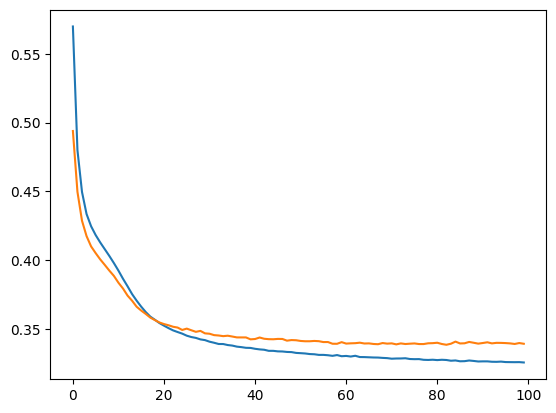

In [31]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])



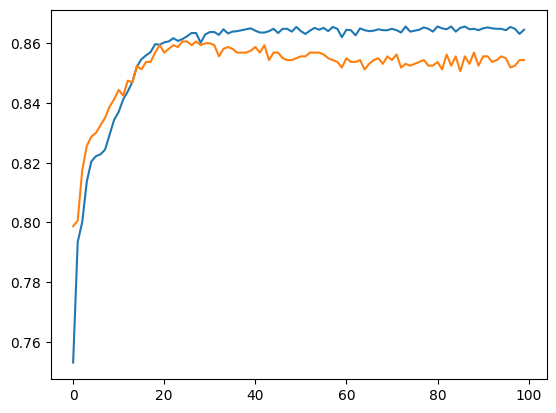

In [32]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

**so done the predictions :)**